In [1]:
#brownian motion, multiple particle
#forward modelling

In [2]:
#the function dy/dt<-f(y,a,b,c,d)
f<-function(y,a,b,c,d){
    return(d*y^3+c*y^2+b*y-a)    
}

In [3]:
#constants
Ca<-10
a<-1
b<- 0.8
c<- 0
d<- -0.001

In [4]:
Nparticle<-1000 #number of particles
T<-  1000   #integration time in time units
h<-  0.5   #step size in time units

In [5]:
N<-T/h
t<-(0:(N-1))*h

In [6]:
x<-matrix(10,Nparticle,N) # Initial condition, all = 0
#x<-matrix(rnorm(Nparticle)*10,Nparticle,N) # Initial condition,

In [7]:
for (i in 1:(N-1)){
    x[,i+1]<- x[,i]+h*f(x[,i],a,b,c,d)  + Ca*rnorm(Nparticle)*sqrt(h)
}

In [8]:
ama2=max(x,2)
ami=min(x,-2)
ama=max(ama2,-ami)

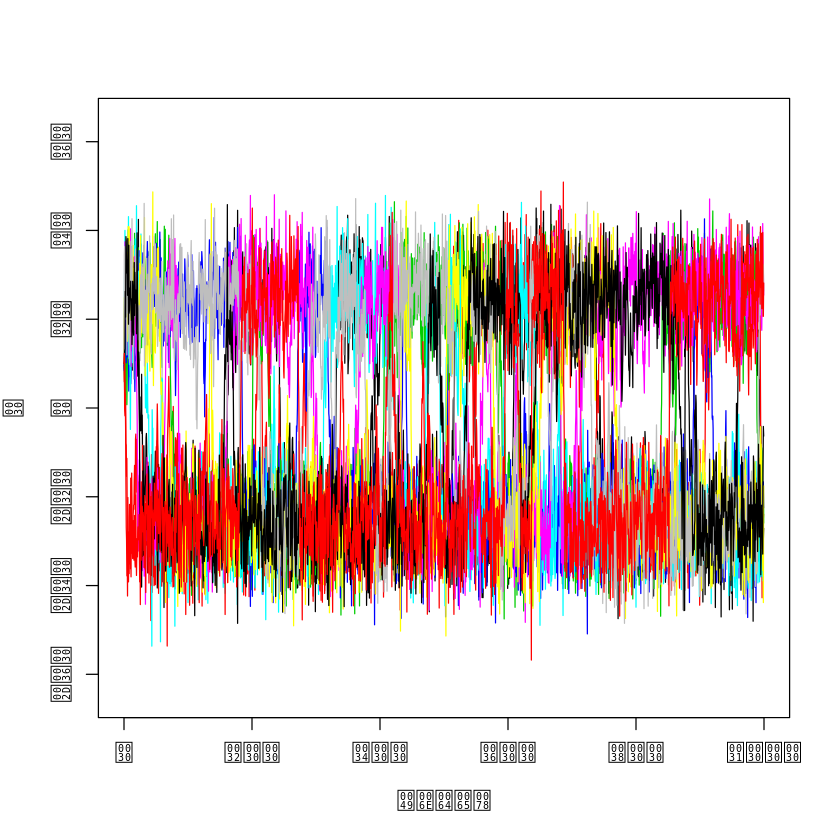

In [9]:
plot(0,xlim=c(0,T),ylim=c(ami,ama),type="n")
#plot(0,xlim=c(0,T),ylim=c(-100,100),type="n")
for (i in 1:10) lines (t,x[i,],col=i)

In [10]:
#analyse the densities
h<-matrix(0,N,40)

In [12]:
# for (i in 1:(N-1)) h[i,]<-hist(x[,i],breaks=c((-20:20)*10),plot=FALSE)$counts

# this below is the right
#for (i in 1:(N-1)) h[i,]<-hist(x[,i],breaks=c(-20:20)*ama/10,freq=FALSE,ylim=c(0,0.04))$counts

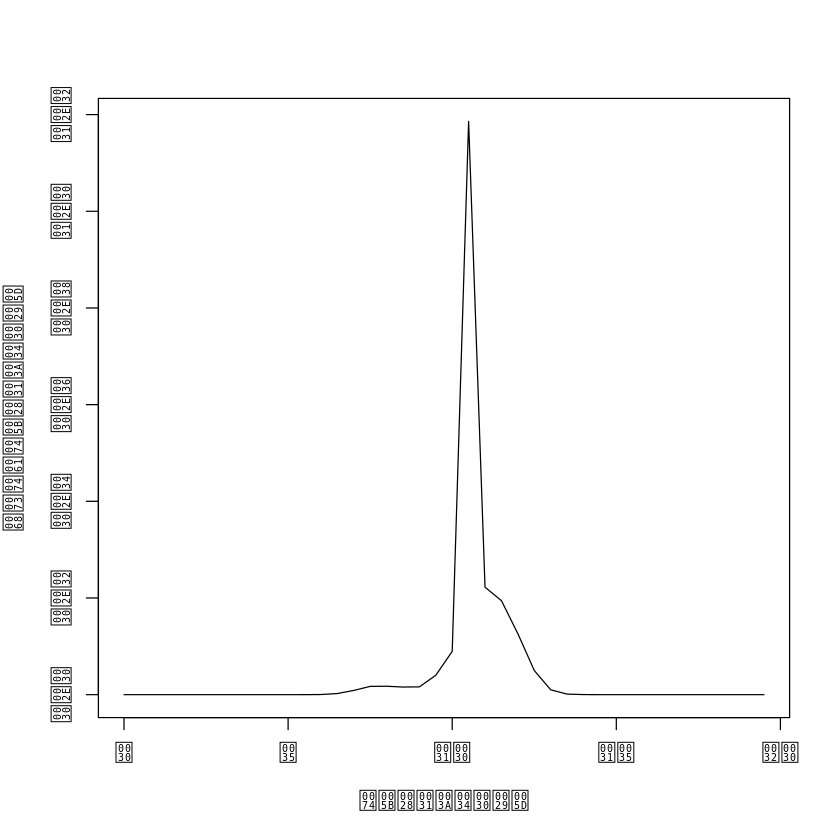

In [17]:
hstat<-matrix(0,N)
for (i in N/2:(N-1)) hstat[]<-h[i,]+hstat[]
hstat[]<-hstat[] *2/Nparticle/N
plot(t[(1:40)],hstat[(1:40)],type="l") #plot(t,hstat[],type="l")

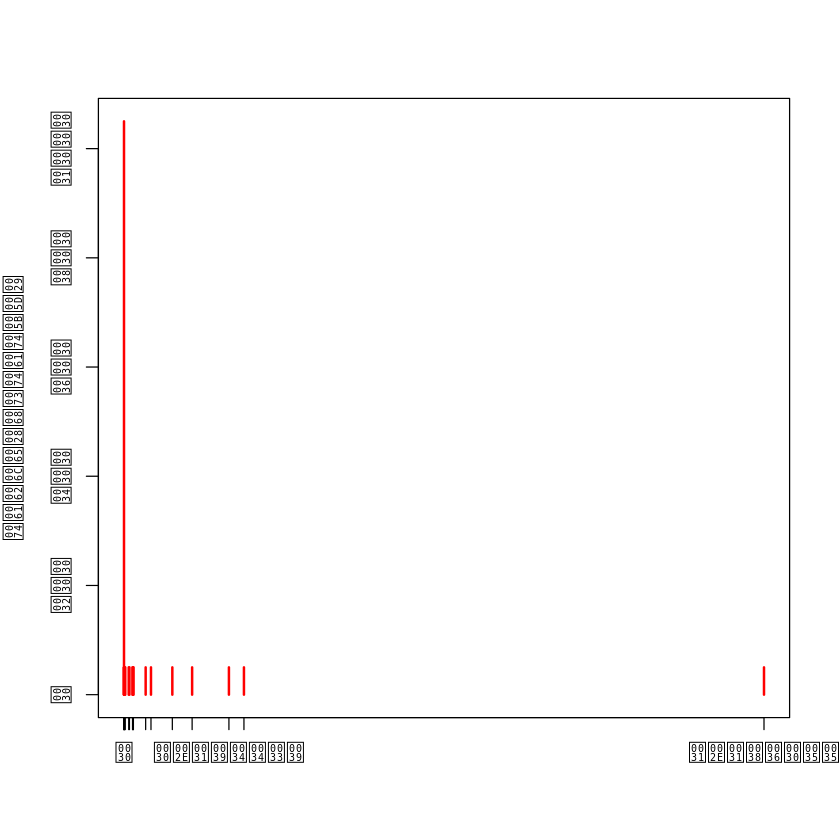

In [14]:
plot(table(hstat[]), type = "h", col = "red")

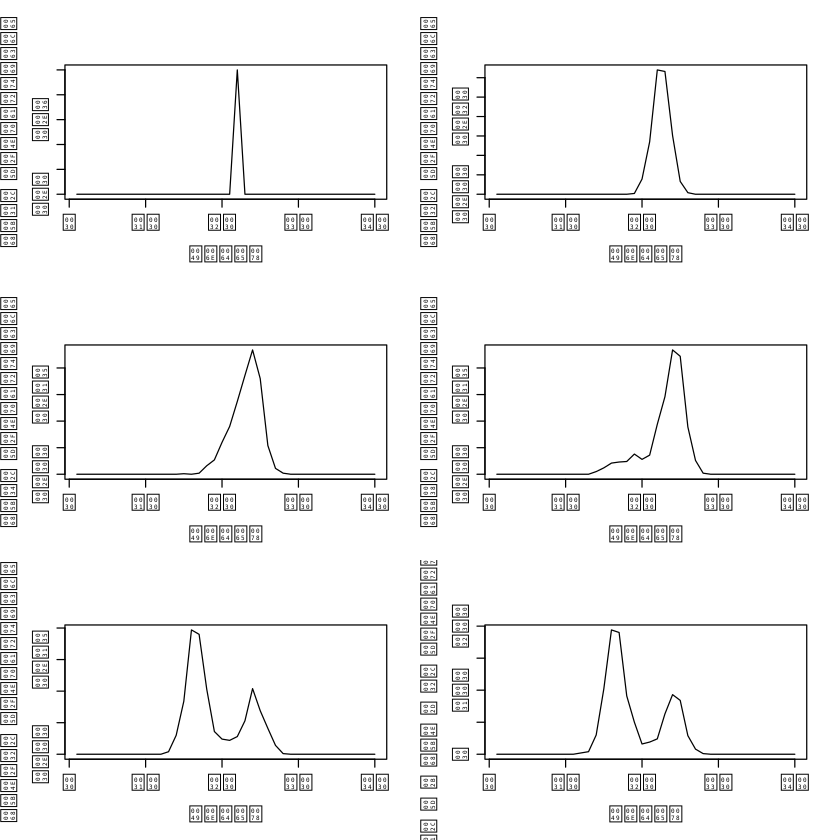

In [15]:
op <- par(mfrow = c(3, 2))
plot(h[1,]/Nparticle,type="l")
plot(h[2,]/Nparticle,type="l")
plot(h[4,]/Nparticle,type="l")
plot(h[8,]/Nparticle,type="l")
plot(h[N/2,]/Nparticle,type="l")
plot(h[N-1,]+h[N-2,]/Nparticle/2,type="l")

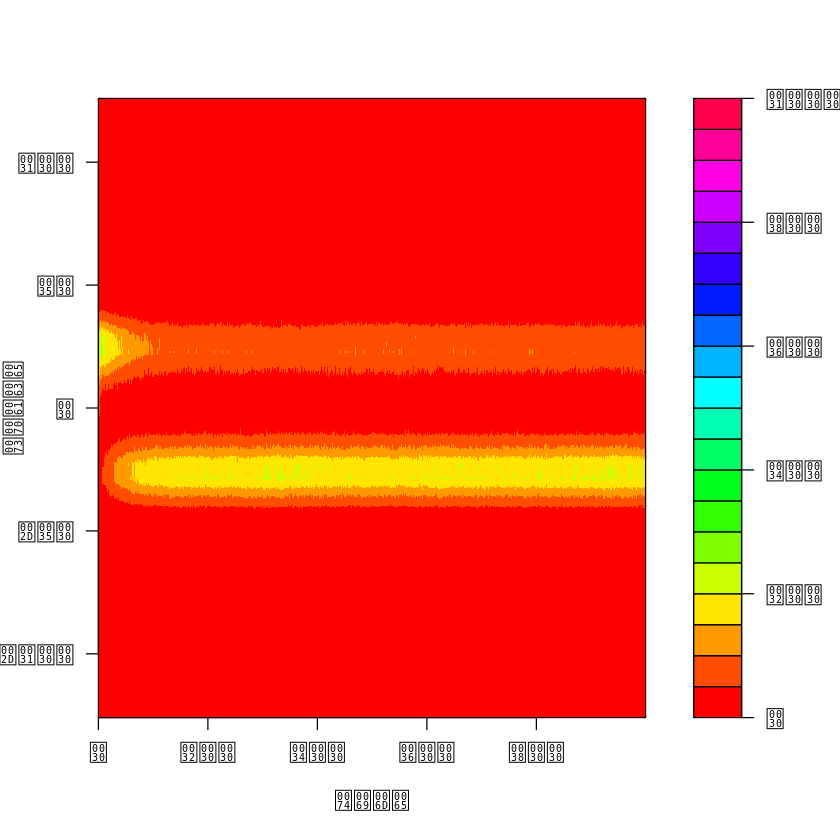

In [16]:
#filled.contour(t,(-19:20)*10-5,h,color.palette=rainbow,xlab="time",ylab="space")
filled.contour(t,(-19:20)*ama/10-ama/20,h,color.palette=rainbow,xlab="time",ylab="space")

In [ ]:
#dev.print(postscript, file="/tmp/out.ps")
# system("lpr -Pps3 /tmp/out.ps")